## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
np.random.seed(123)

## 2. 데이터 불러오기

In [2]:
df=pd.read_csv("train.csv")

## 3. 데이터 탐색

In [3]:
print(df.shape)
df.head()

(3609, 563)


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [4]:
df.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [5]:
df.isnull().sum()
df.isnull().sum().any()

False

<AxesSubplot:xlabel='activity', ylabel='count'>

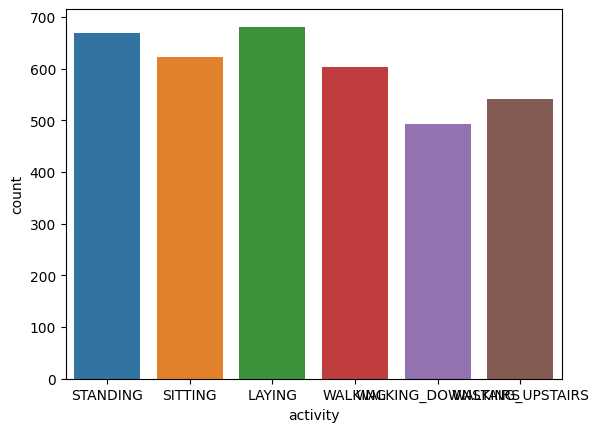

In [6]:
sns.countplot(x=df["activity"])

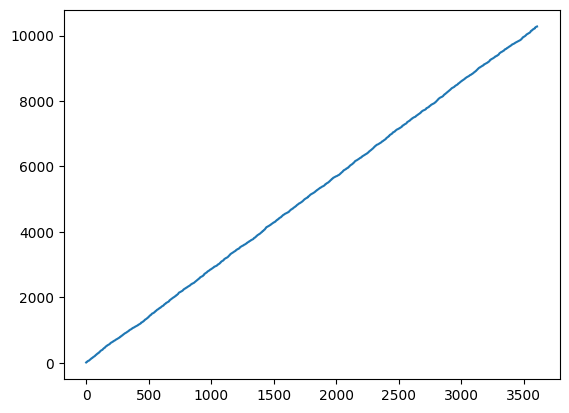

In [7]:
df['rn'].plot()
df=df.drop(labels='rn',axis=1)

In [8]:
features = []
for col in df.columns[1:]: 
    features.append(col)
len(features)


561

In [9]:
x_values = df[features]

In [12]:
from tensorflow.keras.utils import to_categorical

# 각 클래스의 데이터 포인트 수 출력
print(df['activity'].value_counts())

# 각기 다른 클래스에 대하여 다른 숫자를 지정한 딕셔너리
label_encode = {"activity": {"STANDING":0, "SITTING":1,"LAYING":2,"WALKING":3,"WALKING_DOWNSTAIRS":4 ,"WALKING_UPSTAIRS":5}}

# .replace를 사용하여 다른 클래스를 숫자로 변경
df.replace(label_encode,inplace=True)

# 각 클래스의 데이터 포인트 수를 출력하여 클래스가 숫자로 변경되었는지 확인
print(df['activity'].value_counts())

# 클래스를 y_values로 추출
y_values = df['activity']

print(y_values)


LAYING                681
STANDING              668
SITTING               623
WALKING               603
WALKING_UPSTAIRS      541
WALKING_DOWNSTAIRS    493
Name: activity, dtype: int64
2    681
0    668
1    623
3    603
5    541
4    493
Name: activity, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
3604    5
3605    5
3606    5
3607    5
3608    4
Name: activity, Length: 3609, dtype: int64


In [13]:
x_values

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,-0.9410,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,-0.9400,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,-0.9430,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,-0.9260,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,-0.9460,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,0.0262,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,-0.1170,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,-0.1170,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,-0.1760,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=42)

# x_train, x_test, y_train 및 y_test의 행 수 확인
print("Number of rows in x_train:", x_train.shape[0])
print("Number of rows in x_test:", x_test.shape[0])
print("Number of rows in y_train:", y_train.shape[0])
print("Number of rows in y_test:", y_test.shape[0])
print(x_train.shape)
print(np.unique(y_train))

Number of rows in x_train: 2887
Number of rows in x_test: 722
Number of rows in y_train: 2887
Number of rows in y_test: 722
(2887, 561)
[0 1 2 3 4 5]


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

In [16]:
drop_prob1, drop_prob2 = 0.3, 0.2
model_dnn = tf.keras.Sequential([
    tf.keras.layers.Dense(128,  activation='relu', input_shape=(561,)),
    tf.keras.layers.Dropout(drop_prob1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(drop_prob1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(drop_prob2),
    tf.keras.layers.Dense(6, activation='softmax')
    ])

In [17]:
model_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               71936     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7

In [18]:
model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
#model_dnn.fit(x_train,y_train,epochs=30,shuffle=True, validation_data=(x_test, y_test))

In [33]:
history = model_dnn.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=30, 
          batch_size=32)

Epoch 1/30
91/91 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9560 - val_loss: 0.1116 - val_accuracy: 0.9626
Epoch 2/30
91/91 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9612 - val_loss: 0.1376 - val_accuracy: 0.9612
Epoch 3/30
91/91 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9678 - val_loss: 0.1026 - val_accuracy: 0.9626
Epoch 4/30
91/91 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9657 - val_loss: 0.0942 - val_accuracy: 0.9654
Epoch 5/30
91/91 [==============================] - 0s 3ms/step - loss: 0.0837 - accuracy: 0.9716 - val_loss: 0.1419 - val_accuracy: 0.9557
Epoch 6/30
91/91 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9543 - val_loss: 0.1103 - val_accuracy: 0.9695
Epoch 7/30
91/91 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.9706 - val_loss: 0.0956 - val_accuracy: 0.9709
Epoch 8/30
91/91 [==

In [34]:
losses = pd.DataFrame(history.history)

In [36]:
losses.head(6)

,loss,accuracy,val_loss,val_accuracy
0,0.131994,0.956010,0.111612,0.962604
1,0.099644,0.961205,0.137613,0.961219
2,0.089634,0.967787,0.102568,0.962604
3,0.097269,0.965708,0.094174,0.965374
4,0.083689,0.971597,0.141866,0.955679
5,0.110260,0.954278,0.110295,0.969529


In [37]:
pred = model_dnn.predict(x_test)

23/23 [==============================] - 0s 1ms/step


In [38]:
y_pred = np.argmax(pred, axis=1)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       146
           1       0.97      0.88      0.92       126
           2       1.00      1.00      1.00       127
           3       0.98      1.00      0.99       126
           4       0.98      1.00      0.99        90
           5       1.00      0.96      0.98       107

    accuracy                           0.97       722
   macro avg       0.97      0.97      0.97       722
weighted avg       0.97      0.97      0.97       722



In [26]:
df.head(100)

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0,0.279,-0.01960,-0.1100,-0.997000,-0.9670,-0.983,-0.9970,-0.96600,-0.983,...,0.146,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,0,0.277,-0.01270,-0.1030,-0.995000,-0.9730,-0.985,-0.9960,-0.97400,-0.985,...,0.121,0.3490,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,0,0.277,-0.01470,-0.1070,-0.999000,-0.9910,-0.993,-0.9990,-0.99100,-0.992,...,0.740,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,0,0.298,0.02710,-0.0617,-0.989000,-0.8170,-0.902,-0.9890,-0.79400,-0.888,...,0.131,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,0,0.276,-0.01700,-0.1110,-0.998000,-0.9910,-0.998,-0.9980,-0.98900,-0.997,...,0.667,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,0.297,-0.00796,-0.1200,-0.284000,0.0589,-0.308,-0.3660,-0.00667,-0.284,...,0.152,-0.1450,-0.5690,-0.2530,0.1580,-0.8990,0.295,-0.701,0.289,0.0983
96,3,0.366,-0.02040,-0.0893,-0.187000,0.1940,-0.257,-0.2570,0.14000,-0.223,...,0.244,-0.1650,-0.5810,-0.6930,0.3600,0.3940,-0.358,-0.696,0.292,0.1000
97,3,0.331,-0.02870,-0.1080,-0.218000,0.2080,-0.288,-0.2890,0.16400,-0.267,...,0.212,-0.0416,-0.3590,-0.8430,0.2570,0.3330,-0.420,-0.692,0.293,0.1040
98,3,0.190,-0.03890,-0.0987,-0.331000,0.0448,-0.354,-0.3850,0.01280,-0.329,...,0.236,0.0044,-0.2800,0.4780,-0.5210,0.0706,-0.177,-0.696,0.290,0.1040


In [27]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
from sklearn.metrics import f1_score

y_pred_tr = clf.predict(x_test)
#print(y_pred_tr)
print('f1_score: %.5f' % f1_score(y_test, y_pred_tr, average='macro'))

f1_score: 0.89198
